 # 1. Import libraries:

In [210]:
import numpy as np    # for array operations
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import tensorflow as tf
import os    #  to specify location of images
from time import time
import keras
import cv2 
from tqdm import tqdm
import random
import pickle # to save the data

# 2. Preprocessing the data:

In [212]:
DIRECTORY=r"D:\data"
CATEGORIES=['real' , 'forged']

D:\data\real
D:\data\forged


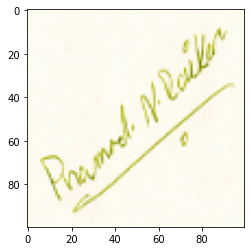

In [213]:
IMG_SIZE=100

data = [] 
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category) # this will join two different paths
    print(folder)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):  # this will list all the files present in folder
        try:
            img_path = os.path.join(folder, img) # path of image
            img_arr = cv2.imread(img_path) # reading the image of that path(img_path) here
            img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            data.append([img_arr, label])
            
            plt.imshow(img_arr)
        except Exception as e:
            pass

In [214]:
len(data) # these many images

120

In [215]:
random.shuffle(data)

In [216]:
 data[0]


[array([[[253, 252, 242],
         [253, 252, 242],
         [253, 252, 243],
         ...,
         [253, 251, 240],
         [253, 251, 240],
         [253, 251, 241]],
 
        [[252, 252, 242],
         [253, 252, 243],
         [252, 252, 242],
         ...,
         [253, 252, 241],
         [253, 251, 240],
         [253, 251, 240]],
 
        [[253, 252, 241],
         [253, 251, 241],
         [252, 252, 242],
         ...,
         [253, 251, 240],
         [253, 251, 241],
         [253, 251, 240]],
 
        ...,
 
        [[253, 251, 241],
         [252, 251, 242],
         [253, 252, 242],
         ...,
         [253, 251, 240],
         [253, 250, 240],
         [253, 249, 238]],
 
        [[253, 251, 241],
         [253, 251, 241],
         [253, 251, 242],
         ...,
         [253, 250, 239],
         [254, 249, 238],
         [253, 249, 238]],
 
        [[253, 251, 240],
         [253, 251, 241],
         [253, 251, 240],
         ...,
         [253, 251, 239],
  

In [217]:
X = []
y = []
for features, labels in data:
    X.append(features)
    y.append(labels)
    

In [218]:
X = np.array(X)
y = np.array(y)

In [219]:
pickle.dump(X, open('X.pkl', 'wb')) # wb="write in binary"
pickle.dump(y, open('y.pkl', 'wb'))

# 3. Training the data:

In [254]:
X = pickle.load(open('X.pkl', 'rb')) # rb="read in binary"
y = pickle.load(open('y.pkl', 'rb')) 


In [255]:
X = X/255    # normalizing the array

In [256]:
X         # array of all the images


array([[[[0.99215686, 0.98823529, 0.94901961],
         [0.99215686, 0.98823529, 0.94901961],
         [0.99215686, 0.98823529, 0.95294118],
         ...,
         [0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.94509804]],

        [[0.98823529, 0.98823529, 0.94901961],
         [0.99215686, 0.98823529, 0.95294118],
         [0.98823529, 0.98823529, 0.94901961],
         ...,
         [0.99215686, 0.98823529, 0.94509804],
         [0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.94117647]],

        [[0.99215686, 0.98823529, 0.94509804],
         [0.99215686, 0.98431373, 0.94509804],
         [0.98823529, 0.98823529, 0.94901961],
         ...,
         [0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.94509804],
         [0.99215686, 0.98431373, 0.94117647]],

        ...,

        [[0.99215686, 0.98431373, 0.94509804],
         [0.98823529, 0.98431373, 0.94901961]

In [257]:
X.shape

(120, 100, 100, 3)

In [290]:
y     # arrays of 0s and 1s

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [259]:
y.shape

(120,)

# 4. CNN Model:

In [260]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [293]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())

model.add(Dense(512, input_shape = X.shape[1:], activation = 'relu'))     

model.add(Dense(10, activation = 'softmax'))

In [294]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [296]:
model.fit(X, y, epochs = 18, validation_split = 0.5)



Epoch 1/18
2/2 [==============================] - 1s 310ms/step - loss: 0.6902 - accuracy: 0.5333 - val_loss: 0.6954 - val_accuracy: 0.4667
Epoch 2/18
2/2 [==============================] - 1s 304ms/step - loss: 0.6889 - accuracy: 0.5333 - val_loss: 0.6944 - val_accuracy: 0.4667
Epoch 3/18
2/2 [==============================] - 1s 287ms/step - loss: 0.6878 - accuracy: 0.5333 - val_loss: 0.6980 - val_accuracy: 0.4667
Epoch 4/18
2/2 [==============================] - 1s 281ms/step - loss: 0.6857 - accuracy: 0.5333 - val_loss: 0.6984 - val_accuracy: 0.4667
Epoch 5/18
2/2 [==============================] - 1s 318ms/step - loss: 0.6846 - accuracy: 0.5333 - val_loss: 0.6961 - val_accuracy: 0.4667
Epoch 6/18
2/2 [==============================] - 1s 310ms/step - loss: 0.6846 - accuracy: 0.5667 - val_loss: 0.6919 - val_accuracy: 0.4833
Epoch 7/18
2/2 [==============================] - 1s 297ms/step - loss: 0.6822 - accuracy: 0.5500 - val_loss: 0.6951 - val_accuracy: 0.4667
Epoch 8/18
2/2 [====

In [297]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 9, 9, 32)        

In [298]:
model.save('signatureforgery1CNN.model')

INFO:tensorflow:Assets written to: signatureforgery1CNN.model\assets


#  5. Prediction

In [299]:
CATEGORIES = ['forge', 'genuine']
image = r'D:\data\forged\forged.0.png'

def prepare(image):
    IMG_SIZE = 100
    img_arr = cv2.imread(image)
    img_arr = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
    return img_arr.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [300]:
 model=keras.models.load_model(r"C:\Users\Pragya Agrawal\signatureforgery1CNN.model")


In [301]:
prediction = model.predict([prepare(image)])
print(CATEGORIES[int(prediction[0][0])])

forge
